# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
data.shape
# 5391 rows, 6 columns

data.isna().any()
# no NaN values present

data.duplicated().any()
# no duplicate values present

data.dtypes
# rank is integer, the rest are objects

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
dirty_cols = ['USD_Production_Budget', "USD_Worldwide_Gross", "USD_Domestic_Gross"]
data[dirty_cols] = data[dirty_cols].replace({'\$': '', ',': ''}, regex=True)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [7]:
for col in dirty_cols:
    data[col] = pd.to_numeric(data[col])

print(data.dtypes)

data.head()

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [8]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
print(data.dtypes)
data.head()

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [9]:
print(f"1. Avg production budget is {data.USD_Production_Budget.mean()}")
print(f"2. Avg worldwide gross revenue is {data.USD_Worldwide_Gross.mean()}")
print(f"3. Lowest worldwide revenue was {data.USD_Worldwide_Gross.min()}")
print(f"3. Lowest domestic revenue was {data.USD_Domestic_Gross.min()}")

# bottom_25 = data.sort_values('Rank')[-int((data.Rank.count() * .25)):]
# bottom_25_profit_domestic = bottom_25.USD_Domestic_Gross - bottom_25.USD_Production_Budget
# bottom_25_profit_domestic.sort_values()


# data.sort_values('USD_Domestic_Gross', ascending=True).head(30)

print(f"5. Highest production budget is {data.USD_Production_Budget.max()}")
print(f"5. Highest worldwide gross revenue is {data.USD_Worldwide_Gross.max()}")
print("\n")
lowest_budget_idx = data.USD_Production_Budget.idxmin()
lowest_budget_gross = data.USD_Domestic_Gross[lowest_budget_idx]
lowest_budget_cost = data.USD_Production_Budget.min()
print(f"6. Revenue made by the lowest budget film is {lowest_budget_gross - lowest_budget_cost}")
print(data.loc[lowest_budget_idx])
print("\n")
highest_budget_idx = data.USD_Production_Budget.idxmax()
highest_budget_gross = data.USD_Domestic_Gross[highest_budget_idx]
highest_budget_cost = data.USD_Production_Budget.max()
print(f"6. Revenue made by the highest budget film is {highest_budget_gross - highest_budget_cost}")
print(data.loc[highest_budget_idx])

1. Avg production budget is 31113737.57837136
2. Avg worldwide gross revenue is 88855421.96271564
3. Lowest worldwide revenue was 0
3. Lowest domestic revenue was 0
5. Highest production budget is 425000000
5. Highest worldwide gross revenue is 2783918982


6. Revenue made by the lowest budget film is 179941
Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object


6. Revenue made by the highest budget film is 335507625
Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object


In [10]:
# or do all this with describe.... duh
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [11]:
data[data.USD_Domestic_Gross == 0].count()
# 512 movies grossed $0 domestically 

data[data.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [12]:
data[data.USD_Worldwide_Gross == 0].count()
# 357 movies grossed $0 worldwide

data[data.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [13]:
worldwide_rev_only = data.loc[(data.USD_Domestic_Gross == 0) & 
                              (data.USD_Worldwide_Gross != 0)]
print(f"Numer of international releases: {len(worldwide_rev_only)}")

Numer of international releases: 155


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [14]:
worldwide_rev_only = data.query('USD_Worldwide_Gross != 0 & USD_Domestic_Gross == 0')
print(f"Worldwide revenue with no US revenue: {len(worldwide_rev_only)}\n")
worldwide_rev_only.sort_values('Rank')

Worldwide revenue with no US revenue: 155



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
...,...,...,...,...,...,...
4862,5206,2015-03-24,Along the Roadside,250000,3234,0
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0
4535,5276,2013-12-31,Speak No Evil,150000,32927,0
4072,5319,2011-12-31,Absentia,70000,8555,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [15]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [16]:
not_yet_released = data[data.Release_Date >= scrape_date]
print(f"Number of unreleased movies: {len(not_yet_released)}")
not_yet_released

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [17]:
data_clean = data.drop(not_yet_released.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [18]:
lost_money = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(f"% of films that lost money: {len(lost_money)/len(data_clean)}")

% of films that lost money: 0.37277117384843983


# Seaborn for Data Viz: Bubble Charts

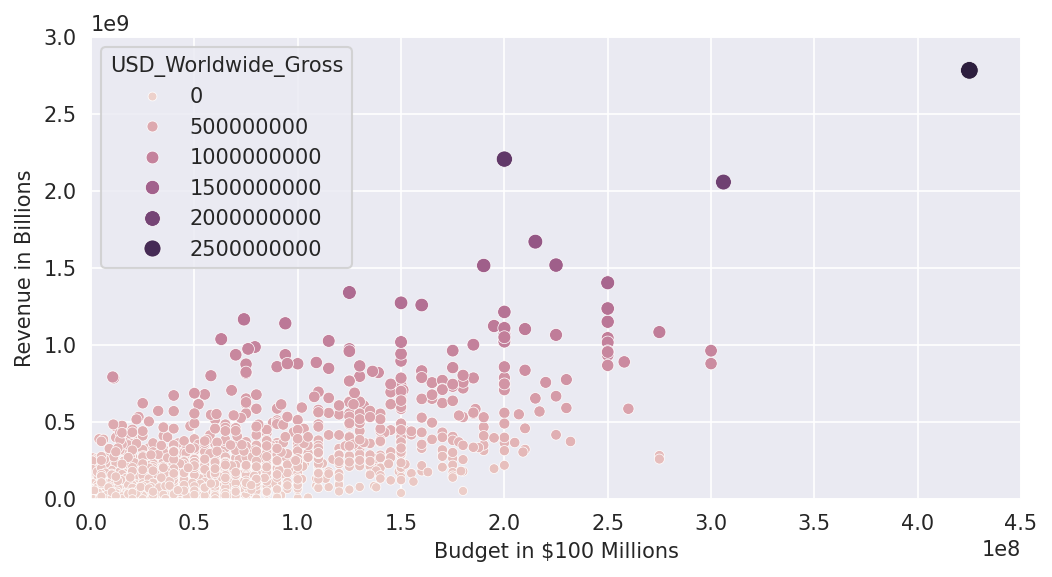

In [26]:
from matplotlib.pyplot import xlabel, xlim, ylabel
import seaborn as sns

plt.figure(figsize=(8,4), dpi=150)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000), xlim=(0, 450000000), 
           ylabel='Revenue in Billions', xlabel='Budget in $100 Millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [32]:
# data_clean.describe()
plt.figure(figsize=(8,4), dpi=150)


with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data_clean, x='Release_Date', y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')
    
    ax.set(ylim=(0, 450000000), xlim=(0, 2020), 
           ylabel='Budget in $100 Millions', xlabel='Release Year')
    
plt.show()

OverflowError: int too big to convert

<Figure size 1200x600 with 1 Axes>

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 